# Assignment 4

This assignment covers material on numerical integration. The assignment is due on by 7pm on Friday the 6th of March.

The breakdown of the marks is as follows:

Question 0 - [1 mark]  
Question 1 - [4 marks]  
Questino 2 - [5 marks]  
Question 3 - [5 marks]  
Question 4 - [5 marks]  
Question 5 - [5 marks]  
Question 6 - [5 marks]  

# Question 0

You should have saved this notebook to your ACM20030-Assignments folder. Now:
- commit the notebook to your local repository
- push the changes to the GitHub

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import math
# The below commands make the font and image size bigger
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)
plt.style.use('seaborn-white')

# Question 1

In this question you will be asked to evaluate definite integrals in the form:

$$ \int_a^b f(x)\, dx$$ 

using Simpson's rule. You can copy code from the [examples repository](https://github.com/nielsw2/ACM20030-Examples) if you wish, but if you do remove all the plotting functionality. Do not use SciPy or any other library to evaluate the integrals, unless explicitly asked to do so.

In [110]:
def SimpsonIntegrate(f,x_start,x_end,step):
    I=0
    n = math.ceil(abs((x_end-x_start)/step)) #This makes sure that the interval is split into an integer
    x = np.linspace(x_start,x_end,n)       #number of chunks that are as close as possible to the desired step size
    j=0
    while(j<n-1):
        a, b, c = x[j], x[j+1], (x[j+1]+x[j])/2
        I += ((b-a)/6)*(f(a) + 4*f(c) + f(b))
        j+=1
    return I

## Q1 a

Evaluate $$ \frac{1}{\sqrt{\pi}}\int^{10}_{-10} e^{-x^2}\, dx$$

Use enough strips so that the result is accurate to a relative error of of at least 1e-6. Hint: to within machine precision the above integral evaluates to  1 .

In [111]:
def f1(x):
    return ((math.exp(-x**2))/np.sqrt(np.pi))
print(str(SimpsonIntegrate(f1,-10,10,0.05)))

1.0


## Q1 b

Evaluate

$$\int^{50}_{-50} \frac{1}{\cosh x}\,dx $$

Use enough strips so that the result is accurate to a relative error of at least `1e-6`. Hint: to within machine precision the above integral evaluates to $\pi$.

In [112]:
def f2(x):
    return (1/(np.cosh(x)))
print(str(SimpsonIntegrate(f2,-50,50,0.02)))

3.141592653589786


## Q1 c

Use SciPy's `integrate.quad()` function to evaluate the integrals in Q1a and Q1b

In [113]:
import scipy.integrate as scpi
print(str(scpi.quad(f1,-10,10)))
print(str(scpi.quad(f2,-50,50)))

(0.9999999999999999, 2.085612812503633e-13)
(3.141592653589793, 5.5381858831212136e-11)


# Question 2 - improper integrals

In the lectures we looked at numerically evaluating indefinite integrals of the form

$$ \int^b_a f(x)\, dx$$ where $a,b$ are finite. What about improper integrals where either $a$, $b$ or both are infinite? The methods we know so far cannot immediately be applied to these cases.

One method is to transform the integral using the result

$$ \int_a^b f(x)\, dx = \int^{1/a}_{1/b} t^{-2} f(t^{-1})\, dt$$

which holds so long as $a,b>0$.

## Q2 a

Using the above result numerically evaluate the following integral

$$ \int^\infty_1 \frac{\log(x)}{x^3}\,dx $$

using Simpson's rule. Use 100 strips to evaluate the integral.

Hint: you will have to use an `if` statement inside your transformed function for to deal with $t=0$. For this case it is useful to note that $\lim_{t\rightarrow0} t \log(1/t) = 0$.

In [114]:
def f3(x):
    return (np.log(x)/(x**3))
def f3integrable(t):
    if (t==0):
        return 0
    else:
        return ((t**-2)*f3(t**-1))
print(str(SimpsonIntegrate(f3integrable,0,1,0.01)))    

0.24999803550118121


## Q2 b

Numerically evaluate

$$ \int^\infty_0 \frac{1}{(x+1)^3}\,dx$$

using Simpson's rule.

Hint: break the integral into two integrals, one with a finite domain and one with an infinite domain. In each domain use 100 strips to evalute the integral. Check your answer against the analytic result.

In [115]:
def f4(x):
    return 1/((x+1)**3)
def f4integrable(t):
    if(t==0):
        return 0
    else:
        return (t**-2)*f4(t**-1)
print(str(SimpsonIntegrate(f4,0,1,0.02) + SimpsonIntegrate(f4integrable,0,1,0.02)))

0.5000000013998477


# Question 3 - Boole's rule

Fitting the integrand to a quintic polynomial results in Boole's rule for integration. In the lecture the formula for Boole's rule was given as

$$ \int^b_a f(x)\,dx \simeq \frac{2 \Delta x}{45}\left(7f_0 + 32 f_1 + 12 f_2 +32f_3 + 7 f_4\right) $$

where $\Delta x = (b-a)/4$, and $f_i = f(a + i\Delta x)$.

## Q3 a

Write a function that numerically integrates another function using Boole's rule. Use the following function definition:

In [116]:
def BooleIntegrate(f, x_start, x_end, step):
    I = 0
    n = math.ceil(abs((x_end-x_start)/step)) #This makes sure that the interval is split into an integer
    x = np.linspace(x_start,x_end,n)       #number of chunks that are as close as possible to the desired step size
    j=0
    while(j<n-1):
        dx = x[j+1]-x[j]
        x0,x1,x2,x3,x4 = x[j],x[j]+(dx/4),x[j]+(dx/2),x[j]+(3*dx/4),x[j+1]
        I += (2*(dx/4)/45)*(7*f(x0) + 32*f(x1) + 12*f(x2) + 32*f(x3) + 7*f(x4))
        j+=1
    return I

Test your function by evaluating the following using 100 strips.

$$ \int_0^\pi \sin(x)\,dx $$

In [117]:
def f5(x):
    return np.sin(x)
BooleIntegrate(f5,0,np.pi,(np.pi)/100)

1.9999999999999991

## Q3 b

For Boole's rule show that the global error scales as $\Delta x^6$. The below plot shows a $\Delta x^6$ reference line.

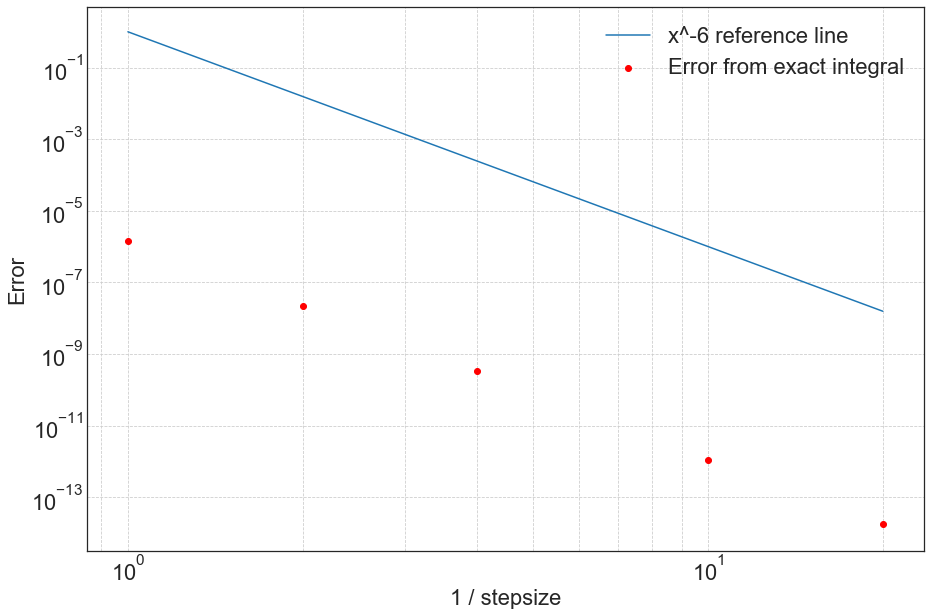

In [118]:
x = np.linspace(1,20,20)
x_ = np.array([1,0.5,0.25,0.1,0.05])
delta_x_to_minus_sixth = x**-6
integralerror0 = abs(BooleIntegrate(f5,0,np.pi,1) - 2)
integralerror1 = abs(BooleIntegrate(f5,0,np.pi,0.5) - 2)
integralerror2 = abs(BooleIntegrate(f5,0,np.pi,0.25) - 2)
integralerror3 = abs(BooleIntegrate(f5,0,np.pi,0.1) - 2)
integralerror4 = abs(BooleIntegrate(f5,0,np.pi,0.05) - 2)
integral_errors = [integralerror0,integralerror1,integralerror2,integralerror3,integralerror4]
plt.xlabel("1 / stepsize")
plt.ylabel("Error")
plt.grid(True, 'both', 'both', linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.plot(x,delta_x_to_minus_sixth,label='x^-6 reference line')
plt.scatter(1/x_,integral_errors,color='red',label="Error from exact integral")
plt.legend()
plt.show()

# Question 4 - integrand with a singularity

The techniques developed in the lecture require the integrand to be continuous and bounded. What happens if there is a singularity in the integrand? In general these can be difficult to deal with (though some more generic methods exist - see, e.g., [Tanh-sinh quadrature](https://en.wikipedia.org/wiki/Tanh-sinh_quadrature)).

In this example we will look at an explicit example that can be dealt with by a change of variables. Consider the identity:

$$ \int_0^1 \frac{f(x)}{x^\alpha}\, dx = \frac{1}{\alpha} \int_0^1 f(t^{1/\alpha}) t^{(1-2\alpha)/\alpha}\,dt$$

which is achived by changing variables using $t = x^\alpha$. This identity holds when $0 < \alpha < 1$ and $f(x)$ is continous on $[0,1]$.

Let
$$I = \int^1_0 \frac{\cos(10x)}{x^{1/2}}\,dx $$

Plot the integrand in the range $[0,1]$, use a grid and label your axes.

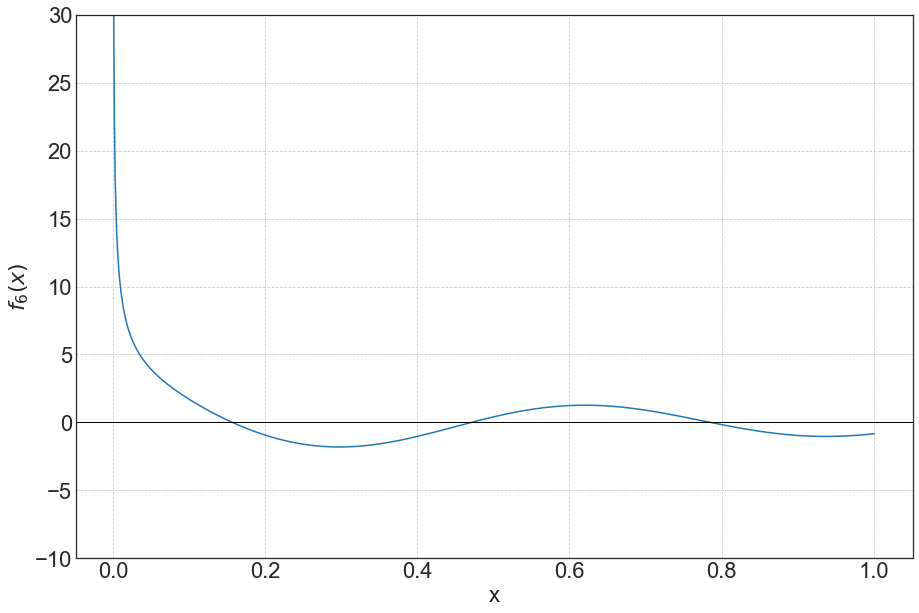

In [119]:
def f6(x):
    return (np.cos(10*x)/np.sqrt(x))
x_vals = np.linspace(0.001,1.001,1000)
plt.plot(x_vals,f6(x_vals))
plt.axhline(linewidth=1, color='black')
plt.xlabel("x")
plt.ylabel("$f_6(x)$")
plt.grid(True, 'both', 'both', linestyle='--')
plt.ylim(-10,30)
plt.show()

Define and plot the transformed integrand. For the plot use a grid and label your axes.

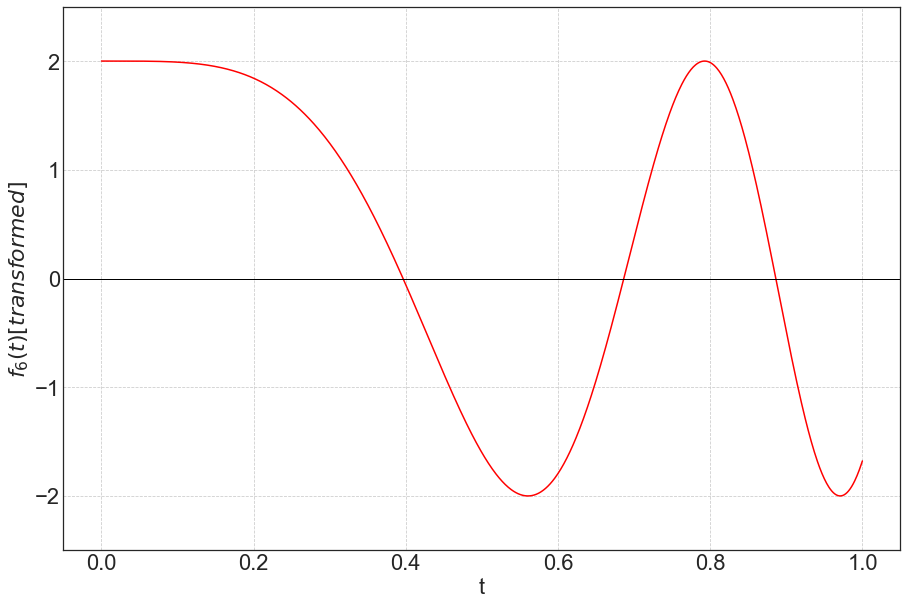

In [120]:
a = 1/2
def f6transformed(t):
    return 2*np.cos(10*t**2)
t_vals = np.linspace(0,1,1000)
plt.plot(t_vals,f6transformed(t_vals),color='r')
plt.axhline(linewidth=1, color='black')
plt.xlabel("t")
plt.ylabel("$f_6(t) [transformed]$")
plt.grid(True, 'both', 'both', linestyle='--')
plt.ylim(-2.5,2.5)
plt.show()

Numerically evaluate $I$ using Simpson's rule. Use 100 strips to do this.

In [121]:
print(str(SimpsonIntegrate(f6transformed,0,1,0.01)))

0.34636620819307845


# Question 5

Write your own function to integrate the following data using Simpson's rule.

In [122]:
x = np.linspace(0, np.pi, 101)
dx = x[1]-x[0]
y = np.sin(x)

In [123]:
# To write this function, I'm going to assume "data" is a list of length 2 containing the lists
# of x and y values, in that order. So data == [[x_0,x_1,x_2,...x_n],[y_0,y_1,y_2,...y_n]].
# Including "dx" in the arguments is redundant as it can simply be taken as the spacing between
# points sampled from the function
def SimpsonIntegrateData(data):
    x, y = data[0], data[1]
    if (len(x)!=len(y)):
        print("Each x value must have a corresponding y value and vica versa.")
        return False
    n = len(x)
    I = 0
    j=0
    while(j<n-2):
        a, b = x[j], x[j+2]
        y0, y1, y2 = y[j], y[j+1], y[j+2] 
        I += ((b-a)/6)*(y0 + 4*y1 + y2)
        j+=2
    return I
data = [x,y]

Integrate the data using your function

In [124]:
print(str(SimpsonIntegrateData(data)))

2.0000000108245044


Recall that Simpson's method needs an odd number of data points to work. If you use an even number you will get a bad result. If you check the convergence rate in this case you will see it is not what is expected. Checking the convergence rate is an important test of an integration code.

# Question 6

Evaluate the following integral using both Simpsons rule and an RK4 ODE method

$$ \int_0^5 \sinh(x) (x-5)\, dx $$

Compare the results of the two methods and take sufficient strips/small enough step sizes to ensure the results agree to a relative accuracy of 1e-6.

To clarify the method here: I will first use a regular Simpson's method to evaluate the above integral. But, we can solve this integral another way. If we let $\frac{dy}{dx} \ =\ \sinh( x)( x-5)$ then it is clear that $$ \int_0^5 \sinh(x) (x-5)\, dx = y(5) - y(0).$$ 
With this in mind, we can use an RK4 method to solve for $y$ and then compute $y(5) - y(0)$. It is also important to note that when solving this ODE, the initial conditions are completely arbitrary - the constants of integration will simply cancel out when we compute the above difference.

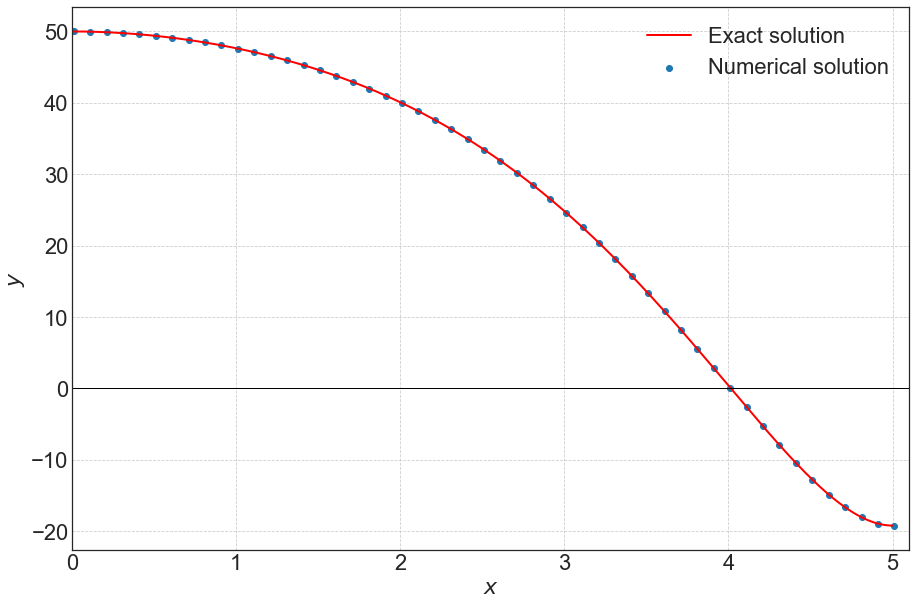

According to the RK4 ODE solver, the approximate value of y(5) - y(0) is -68.9268
According to our Simpson's method function, the approximate value of y(5)-y(0) is -69.2032


In [126]:
def yprime(x,y):
    return np.sinh(x)*(x-5)   #Although it might seem strange I'm defining the same function twice,
def yprime_(x):               #it must be done because our RK4 solver takes in functions of two  
    return np.sinh(x)*(x-5)   #variables whereas our Simpson's method takes functions of one variable 
def y_exact(x,c):             
    return ((x-5)*np.cosh(x) - np.sinh(x) + c)      
x = np.linspace(0,5,500)
#Computing a numerical solution with an RK4 method
y_numerical = scpi.solve_ivp(yprime,[0,5.01],[50],dense_output=True,max_step=0.1,method='RK45')
plt.scatter(y_numerical.t,y_numerical.y[0],label='Numerical solution',marker='o')
plt.plot(x,y_exact(x,55),label='Exact solution',color='red',linewidth=2)
plt.axhline(linewidth=1, color='black')
plt.xlim(0,5.1)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True, 'both', 'both', linestyle='--')
plt.legend()
plt.show()

#And now actually computing y(5) - y(0)
y_0 = 50 #This is simply the value of y_numerical at x=0.
y_5 = 0 #This will be the value of y_numerical at (roughly) x=5
# The numerical solver may not have produced a solution point with an x value of exactly 5, 
# but we can get close enough.
for i in range(0,len(y_numerical.t)):
    if (abs(y_numerical.t[i]-5 <= 0.005)):
        y_5 = y_numerical.y[0][i]
print("According to the RK4 ODE solver, the approximate value of y(5) - y(0) is " 
      + str(round((y_5 - y_0),4)))

#And now computing the integral using our Simpson's method
sinh_integral = SimpsonIntegrate(yprime_,0,5,0.01)
print("According to our Simpson's method function, the approximate value of y(5)-y(0) is "
     + str(round(sinh_integral,4)))

Our two methods agree with each other well. The difference between them is only 0.2764, or less than half a percent. However, our Simpson's method answer agrees better with the exact solution of $( x-5)\cosh( x) \ -\ \sinh( x) \ |^{5}_{0}$ or approximately −69.2032105778. Also, our Simpson's method is more efficient, as it only returns a single number rather than a SciPy RK4 solution object. Finally, our Simpson's method doesn't have the issues with endpoints that our RK4 method has, where we had to search for an $x$ value close enough to 5 - with the Simpson's method we can choose to stop at <i>exactly<i> $x=5$. 